In [ ]:
# Step 1 : EDA and Data Exploration
# Step 2 : Data Preprocessing
# Step 3: Model Building
# Step 4 : Model Evaluation
# Step 5 : Interpretation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic train and test datasets
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')

# Display first few rows and check data types
print(train_df.head())
print(train_df.info())

# Drop non-numeric columns for correlation matrix
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
train_df_numeric = train_df[numeric_cols]

print(train_df_numeric.info())
# Summary statistics
print(train_df_numeric.describe())






   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

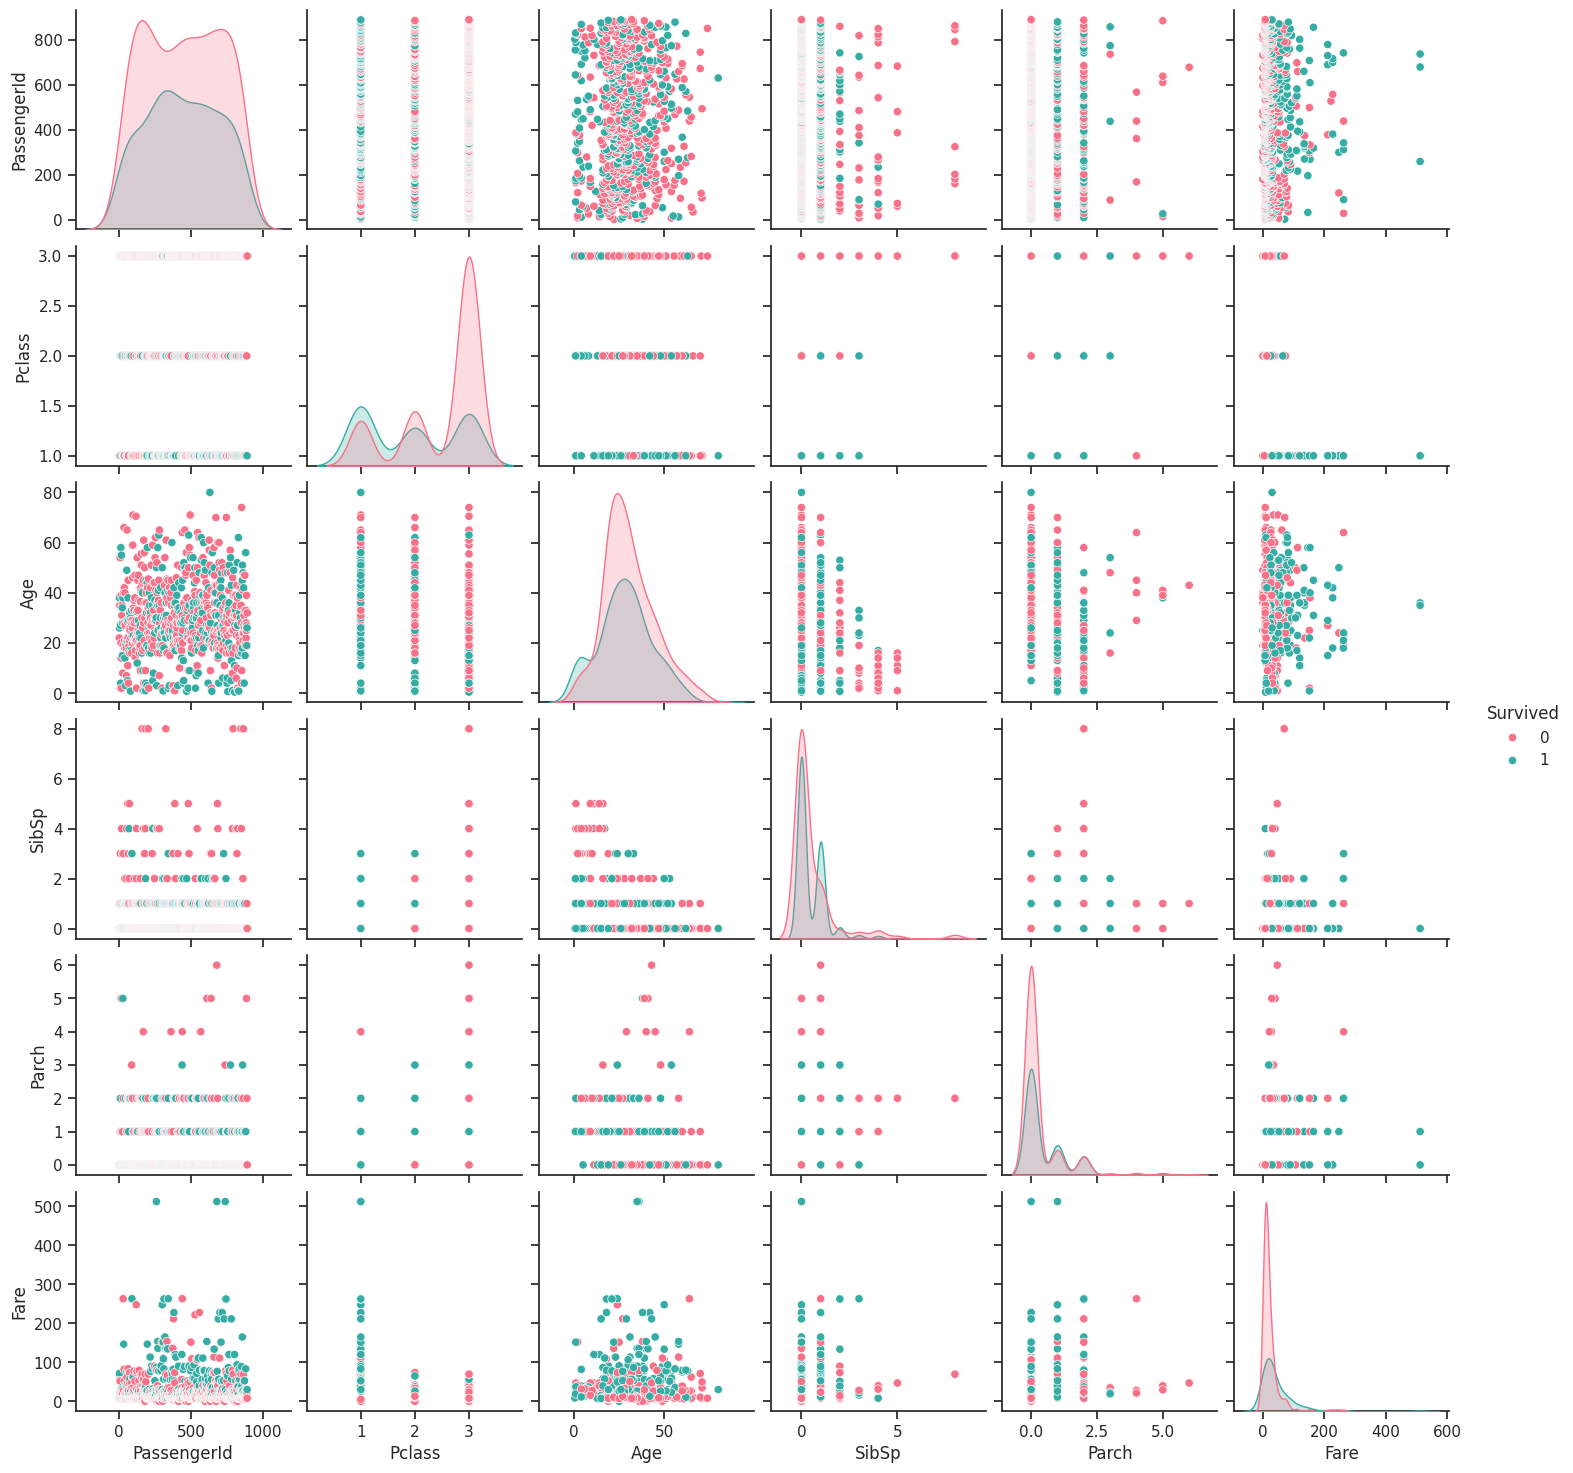

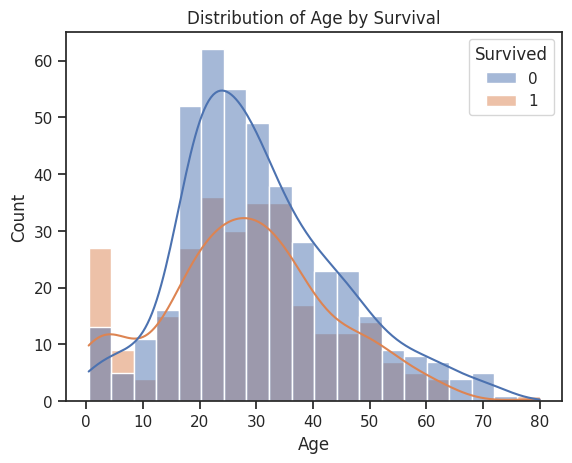

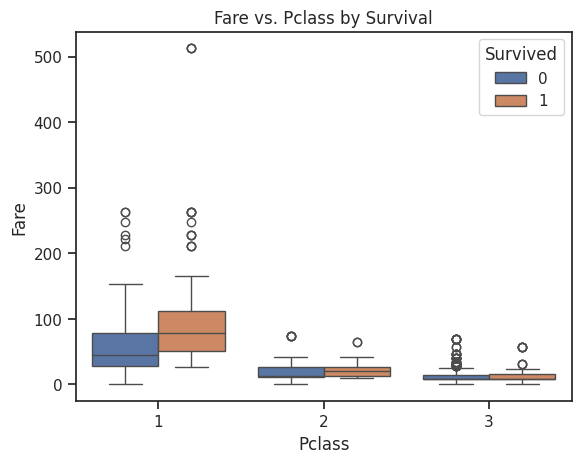

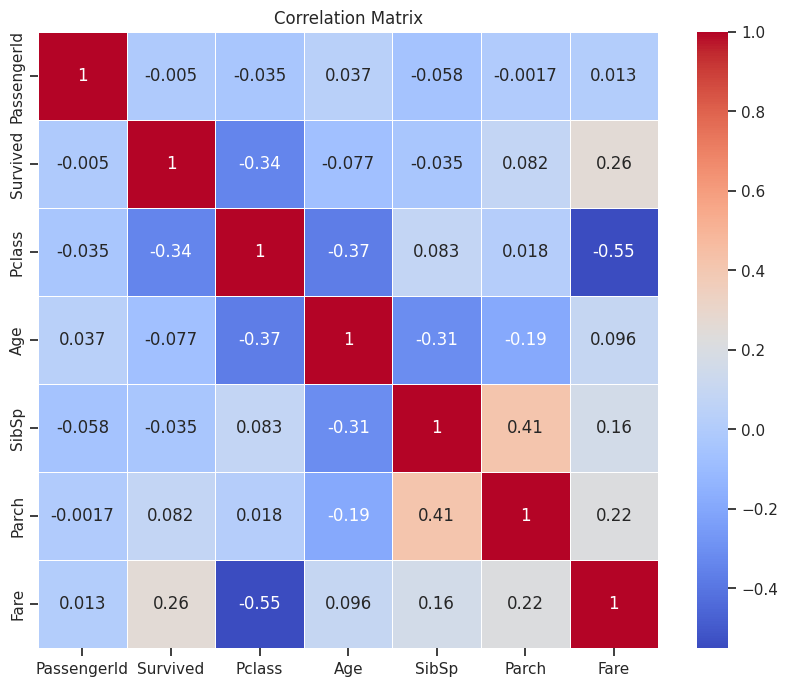

In [ ]:
# Visualizations
sns.set(style="ticks", color_codes=True)
sns.pairplot(train_df_numeric, hue="Survived", palette="husl")
plt.show()

# Other visualizations (e.g., histograms, box plots) as needed
sns.histplot(data=train_df_numeric, x='Age', hue='Survived', kde=True)
plt.title('Distribution of Age by Survival')
plt.show()

sns.boxplot(data=train_df_numeric, x='Pclass', y='Fare', hue='Survived')
plt.title('Fare vs. Pclass by Survival')
plt.show()

# Correlation matrix
corr_matrix = train_df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Step 2 : DATA PREPROCESSING

In [ ]:
# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)


# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Separate features (X) and target (y) for training data
X_train = train_df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y_train = train_df['Survived']

Step 3: MODEL BUILDING

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model using training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Step 4: MODEL EVALUATION

Accuracy: 0.7912
Precision: 0.7422
Recall: 0.6988
F1-score: 0.7199
ROC AUC Score: 0.8466


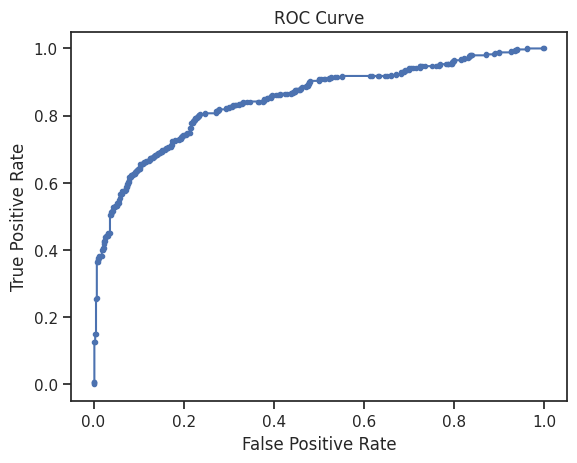

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

# Predict on training data (cross-validation prediction)
y_pred = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Convert probabilities to binary predictions
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# Evaluate performance
accuracy = accuracy_score(y_train, y_pred_binary)
precision = precision_score(y_train, y_pred_binary)
recall = recall_score(y_train, y_pred_binary)
f1 = f1_score(y_train, y_pred_binary)
roc_auc = roc_auc_score(y_train, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Visualize ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# Extract coefficients and feature names
coef = model.coef_[0]
feature_names = X_train.columns

# Create a dataframe to interpret coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print("Logistic Regression Coefficients:")
print(coef_df)

# Discuss feature significance based on coefficients
# Positive coefficients indicate a positive impact on the probability of survival,
# while negative coefficients indicate a negative impact.

Logistic Regression Coefficients:
  Feature  Coefficient
3   Parch     0.218156
4    Fare     0.004751
1     Age    -0.037856
2   SibSp    -0.236079
0  Pclass    -0.925116


**Interpretation**: In the Titanic dataset, after building a logistic regression model to predict survival, we might interpret the significance of features as follows:

Age: A negative coefficient suggests that older passengers were less likely to survive, possibly due to priority given to younger individuals during evacuation.

Fare: A positive coefficient indicates that passengers who paid higher fares were more likely to survive, potentially reflecting their access to better accommodations or closer proximity to lifeboats.

**Deployment**

In [ ]:
pip install streamlit pandas scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
# Step2:. Prepare the Model and Data
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
train_df = pd.read_csv('/content/Titanic_train.csv')

# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

# Preprocessing pipeline
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
import streamlit as st

# Title and description
st.title('Titanic Survival Prediction')
st.write('This app predicts the survival probability of Titanic passengers based on input features.')

# Input form
st.sidebar.header('User Input Parameters')

def user_input_features():
    Pclass = st.sidebar.selectbox('Pclass', [1, 2, 3])
    Sex = st.sidebar.selectbox('Sex', ['male', 'female'])
    Age = st.sidebar.slider('Age', 0, 100, 30)
    SibSp = st.sidebar.slider('Siblings/Spouses Aboard', 0, 10, 0)
    Parch = st.sidebar.slider('Parents/Children Aboard', 0, 10, 0)
    Fare = st.sidebar.slider('Fare', 0, 600, 50)
    Embarked = st.sidebar.selectbox('Embarked', ['C', 'Q', 'S'])
    data = {'Pclass': Pclass,
            'Sex': Sex,
            'Age': Age,
            'SibSp': SibSp,
            'Parch': Parch,
            'Fare': Fare,
            'Embarked': Embarked}
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

# Make predictions
prediction = model.predict(input_df)
prediction_proba = model.predict_proba(input_df)

# Display prediction
st.subheader('Prediction')
survival_status = ['Not Survived', 'Survived']
st.write(survival_status[prediction[0]])

# Display prediction probabilities
st.subheader('Prediction Probability')
st.write(f"Probability of Not Surviving: {prediction_proba[0][0]:.2f}")
st.write(f"Probability of Surviving: {prediction_proba[0][1]:.2f}")